<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
from scipy.stats import spearmanr
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [343]:
data = pd.read_csv("/Users/ashort/desktop/ECON628-01-ashort7/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv")

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [344]:
data.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34



## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [345]:
for header in data.head(0):
    if data[header].isnull().sum() == 0:
        pass
    else:
        print 'The column {} has missing values totalling {}'.format(header, data[header].isnull().sum())

The column County Number has missing values totalling 1077
The column County has missing values totalling 1077
The column Category has missing values totalling 68
The column Category Name has missing values totalling 632


The 4 columns that have missing data contain non-statiscal value i.e. the County Number is simply an assigned number that is assigned to a particular county.
The category is again a set number that refers the category name. 
I will try to create a dictionary to replace some of the category names by using the category numbers as keys.
Hopefully this will reduce the number of missing values in the Category Name column. 
It looks like the County and County Number missing values exactly match up so I wouldn't be able to use the same dictionary idea as above to reduce the number of NaN values. 

In [346]:
data[data['County'].isnull()].head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
135,01/20/2016,5222,CEDAR RAPIDS,52402,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,Paul Masson Grande Amber Brandy,375,$3.22,$4.83,24,$115.92,9.00,2.38
198,03/02/2016,3820,SIOUX CITY,51103,NaN,NaN,1032080.0,IMPORTED VODKA,35,34359,Grey Goose Vodka,200,$5.00,$7.50,12,$90.00,2.40,0.63
272,03/21/2016,4222,EVANSDALE,50707,NaN,NaN,1062300.0,FLAVORED RUM,370,42716,Malibu Coconut Rum,750,$7.49,$11.24,3,$33.72,2.25,0.59


In [347]:
data[data['Category Name'].isnull()]


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
896,02/05/2015,4829,DES MOINES,50314,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,$23.58,$35.37,6,$212.22,4.50,1.19
901,02/25/2016,4647,WATERLOO,50707,7.0,Black Hawk,1052100.0,NaN,420,48099,Hennessy VS,200,$5.74,$8.61,24,$206.64,4.80,1.27
1514,02/18/2016,2515,MASON CITY,50401,17.0,Cerro Gordo,1082100.0,NaN,420,67487,Grand Marnier Raspberry Peach,750,$23.31,$34.97,2,$69.94,1.50,0.40
1684,02/08/2016,3747,SIGOURNEY,52591,54.0,Keokuk,1052100.0,NaN,420,48106,Hennessy Vs Cognac,750,$18.99,$28.49,2,$56.98,1.50,0.40
2203,02/16/2016,4589,SIBLEY,51249,72.0,Osceola,1032100.0,NaN,115,34821,Svedka Vodka,1750,$14.74,$22.11,2,$44.22,3.50,0.92
2894,02/09/2016,2413,DUBUQUE,52001,31.0,Dubuque,1082100.0,NaN,130,64136,Disaronno Amaretto,750,$13.86,$20.79,12,$249.48,9.00,2.38
3071,02/15/2016,2539,IOWA FALLS,50126,42.0,Hardin,1052100.0,NaN,420,48106,Hennessy Vs Cognac,750,$18.99,$28.49,3,$85.47,2.25,0.59
3482,02/10/2016,3524,AMES,50010,85.0,Story,1032100.0,NaN,115,34821,Svedka Vodka,1750,$14.74,$22.11,6,$132.66,10.50,2.77
4596,02/03/2016,2594,SIOUX CITY,51106,97.0,Woodbury,1052100.0,NaN,420,48099,Hennessy VS,200,$5.74,$8.61,1,$8.61,0.20,0.05
4989,02/23/2016,2620,WINDSOR HEIGHTS,50311,77.0,Polk,1091100.0,NaN,208,27439,Tim Smith's Climax Moonshine,750,$17.50,$26.25,6,$157.50,4.50,1.19


### 3.2 Clean the columns

I am beginning the cleaning of my data. Just from looking at the data it seems that there's some direct mapping between Category and Category Name, as well as Item Description and Category Name. 
I'll make a dictionary that includes the two and try and reduce the number of NaN values in Category Name. 

In [348]:
def mapping(cat1, cat2):

    cat1_to_cat2_key = {}
    
    for x in range(len(data['Category']-1)):
        if data[cat1][x] != str('nan') and data[cat2][x] != float('nan'):
            if cat1_to_cat2_key.has_key(data[cat1][x]) == False:
                cat1_to_cat2_key[data[cat1][x]] = data[cat2][x]
            else:
                pass
        else:
            pass  
    return cat1_to_cat2_key

def list_(cat1_cat2_dict, cat1):
    new_cat2_list = []
    for x in range(len(data['Category']-1)):
        try:
            new_cat2_list.append(cat1_cat2_dict[data[cat1][x]])
        except:
            new_cat2_list.append('NaN')
    return new_cat2_list

Cat_to_CatName = mapping("Category", "Category Name")
Category_Name = list_(Cat_to_CatName, "Category")

In [349]:
data['Category_Name'] = Category_Name
data['Category_Name'].isnull().sum()

564

I will now build a dictionary for Item Description (as the dictionary for Category reduced the number of NaN values by only a small amount).

In [350]:
ItemD_to_CatName = mapping("Item Description", "Category Name")
Category_Name_ = list_(ItemD_to_CatName, "Item Description")

In [351]:
data['Category_Name_'] = Category_Name_

There were some descrepancies between the two new columns of Category Name e.g. in row 896 the Category mapping gave a different result to Item Description mapping. If this pops up I will use the Category mapping as the more rigid test as a number is less subjective than a description. 
So the code below combines the two columns to create a column that is (hopefully) vastly reduced in the number of null results. 

In [352]:
combo = []
for x in range(len(data['Category']-1)):
    
    if data['Category_Name'][x] == data['Category_Name_'][x]:
        combo.append(data['Category_Name'][x])
    elif type(data['Category_Name'][x]) == float:
        combo.append(data['Category_Name_'][x])
    elif data['Category_Name'][x] != data['Category_Name_'][x]:
        combo.append(data['Category_Name'][x])
    else:
        pass

In [353]:
data['Category__Name'] = combo

In [354]:
data['Category__Name'].isnull().sum()

70

In [ ]:
header = ['Category_Name', 'Category_Name_']
for head in header:
    del data['{}'.format(head)]

This worked. I removed the excess Category Name columns so that I was left with the perfect one using.
I will now quickly do the same thing between City and County to try to reduce the number of NaN. I don't need to do it for County Number because it's a pretty useless column. 

In [360]:
City_to_County = mapping("City", "County")
City_to_County['WAVERLY'] = 'Bremer'
County_ = list_(City_to_County, "City")
data['County_'] = County_

In [361]:
del data['County']

In [362]:
data['County'] = data['County_']
data['Category Name'] = data['Category__Name']
del data['County_']
del data['Category__Name']

This shows there is some serious descrepancy between my County column and the original. It seems some cities have been labelled differently e.g. Bettendorf has been labelled as Iowa in some cases and Scott in others. I want to keep a single city under the same county name. So I will use my new column as the fixed one. 
I need to change the dictionary entry for Waverly as the first entry was NaN and so that messed up my column. 

This is my dataframe that has had as many of the NaN values removed as possible. 

In [372]:
data.head()

,Date,Store Number,City,Zip Code,County Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),County
0,11/04/2015,3717,SUMNER,50674,9.0,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38,Bremer
1,03/02/2016,2614,DAVENPORT,52807,82.0,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40,Scott
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34,Black Hawk
3,02/03/2016,2501,AMES,50010,85.0,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77,Story
4,08/18/2015,3654,BELMOND,50421,99.0,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55,Wright



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.


I am going to remove some columns that I think are just very unnecessary. These include County Number, Category and Volume Sold(gallons) because they all contain data that is directly expressed in a better way in another column already. 

In [373]:
columns = ['County Number', 'Category', 'Volume Sold (Gallons)']
for col in columns:
    del data[col]

In [371]:
data.to_excel("Iowa_Liquor_Data.xlsx", "Sheet 1")


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [3]:
data = pd.read_excel("Iowa_Liquor_Data.xlsx")


To tackle the first part of this problem I will try to isloate individual stores based on their store number and the order my dataframe based on the date and store number. 
Then, by analysing each store number individually I should be able to see how long they've been taking orders. For the stores that have been around a long time I would expect them to have been taking orders regularly throughout the whole of 2015 and into 2016. For those stores that either opened in 2015 or closed in 2015 I'd expect to see absent orders either before or after a certain date in 2015. 
The exact cutoff for this date is very subjective. The question is: "what is the maximum amount of time acceptable for a store to go without taking an order?". 
Once I've sorted my data I will be able to give a subjective answer to this question. 

In [4]:
Store_Number = [store for store in data['Store Number']]
Sto_Num_Sort = set(sorted(Store_Number))

It would be easier to identify stores based on how long they've been open by looking at the date. Instead of turning the date column into a datetime stamp (which is complicated and off the top of my head I can't remember how to do it), I'm just going to turn the dates into a number and then order the numbers. 
This is a very un-pythonic way of doing it, but because I am only concerned with whole-year time intervals it doesn't really matter about the exact day and month. 

In [5]:
Alt_Date = []
for date in data['Date']:
    a = date.split("/")
    Alt_Date.append(a[2]+a[0]+a[1])

In [6]:
data['Alt_Date'] = Alt_Date

In [7]:
# Sorted the data based on Store Number and Date to try and work out which stores have been open for a while and which have not. 
sorted_data = data.sort_values(['Store Number', 'Alt_Date'], ascending=True).reset_index()
del sorted_data['index']
sorted_data.head()

,Date,Store Number,City,Zip Code,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),County,Alt_Date
0,01/08/2015,2106,CEDAR FALLS,50613,PUERTO RICO & VIRGIN ISLANDS RUM,35,43127,Bacardi Superior Rum,1000,$9.50,$14.25,36,$513.00,36.0,Black Hawk,20150108
1,01/08/2015,2106,CEDAR FALLS,50613,TEQUILA,410,88296,Patron Tequila Silver,750,$27.00,$40.50,12,$486.00,9.0,Black Hawk,20150108
2,01/08/2015,2106,CEDAR FALLS,50613,SPICED RUM,259,43026,Admiral Nelson Spiced Rum,750,$5.78,$8.67,12,$104.04,9.0,Black Hawk,20150108
3,01/08/2015,2106,CEDAR FALLS,50613,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,12,$225.00,9.0,Black Hawk,20150108
4,01/08/2015,2106,CEDAR FALLS,50613,PUERTO RICO & VIRGIN ISLANDS RUM,434,46351,Hawkeye Light Rum,1000,$4.34,$6.51,12,$78.12,12.0,Black Hawk,20150108


In [8]:
new_stores = []
for store in Sto_Num_Sort:
    sto = pd.DataFrame(sorted_data[sorted_data['Store Number'] == store].reset_index())
    if (int(sto['Alt_Date'][0]) > 20150101):
        if int(sto['Alt_Date'][len(sto)-1]) - int(sto['Alt_Date'][0]) < 1100:
            new_stores.append(store)
        else:
            pass
    else:
        pass   
old_stores = []
for store in Sto_Num_Sort:
    sto = pd.DataFrame(sorted_data[sorted_data['Store Number'] == store].reset_index())
    if (int(sto['Alt_Date'][0]) > 20150101):
        if int(sto['Alt_Date'][len(sto)-1]) - int(sto['Alt_Date'][0]) > 1100:
            old_stores.append(store)
        else:
            pass
    else:
        pass   


In [9]:
print len(new_stores), len(Sto_Num_Sort), float((len(new_stores) / float(len(Sto_Num_Sort))) * 100), len(old_stores)

114 1400 8.14285714286 1286


Using the rookie Alt_Date variable I created, I just created a list of stores whose first order date was later than the New Years Day 2015 and who's last order occured earlier than 11 months after the first order. This highlights the new stores whose data is not complete enough to be comparable to the others. The list comprises about 8% of the data, so not a huge value which is reassuring. 
Because of the small percentage value I'll just remove those stores and attach them to their own dataframe. 

In [10]:
df_new = pd.DataFrame(sorted_data.head(0))
for stores in new_stores:
    df_new = pd.concat([df_new, sorted_data[sorted_data['Store Number'] == stores]], axis=0)
df_new.reset_index() 

,index,Date,Store Number,City,Zip Code,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),County,Alt_Date
0,270953,10/27/2015,9018,Dubuque,52001,SPICED RUM,207,46686,Paradise Island Bay Rum,750,$14.30,$21.45,300,$6435.00,225.00,Dubuque,20151027
1,270954,03/08/2016,9023,Carroll,51401,STRAIGHT BOURBON WHISKIES,116,26996,Iowa Legendary Rye Unaged,750,$17.59,$26.39,24,$633.36,18.00,Carroll,20160308
2,8225,01/06/2015,2367,SHENANDOAH,51601,STRAIGHT BOURBON WHISKIES,125,17206,Cedar Ridge Bourbon,750,$17.60,$26.40,3,$79.20,2.25,Page,20150106
3,8226,01/06/2015,2367,SHENANDOAH,51601,PUERTO RICO & VIRGIN ISLANDS RUM,35,43121,Bacardi Superior Rum Mini,500,$5.54,$8.31,1,$8.31,0.50,Page,20150106
4,8227,01/13/2015,2367,SHENANDOAH,51601,CANADIAN WHISKIES,115,11788,Black Velvet,1750,$10.45,$15.68,6,$94.08,10.50,Page,20150113
5,8228,01/20/2015,2367,SHENANDOAH,51601,TRIPLE SEC,434,86506,Paramount Triple Sec,750,$3.42,$5.13,12,$61.56,9.00,Page,20150120
6,8229,01/27/2015,2367,SHENANDOAH,51601,WHISKEY LIQUEUR,85,86886,Southern Comfort,750,$9.85,$14.78,12,$177.36,9.00,Page,20150127
7,8230,02/10/2015,2367,SHENANDOAH,51601,VODKA FLAVORED,380,40403,UV Peach,750,$6.50,$9.75,3,$29.25,2.25,Page,20150210
8,8231,02/10/2015,2367,SHENANDOAH,51601,BLENDED WHISKIES,65,22788,Beam's 8 Star Bl Whiskey,1750,$7.61,$11.42,6,$68.52,10.50,Page,20150210
9,8232,02/17/2015,2367,SHENANDOAH,51601,SCOTCH WHISKIES,260,10278,Usher's Green Stripe,1750,$10.00,$15.00,6,$90.00,10.50,Page,20150217


In [11]:
df_old = pd.DataFrame(sorted_data.head(0))
for stores in old_stores:
    df_old = pd.concat([df_old, sorted_data[sorted_data['Store Number'] == stores]], axis=0)
df_old.head()

,Date,Store Number,City,Zip Code,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),County,Alt_Date
270857,01/07/2015,9001,SWISHER,52338,MISCELLANEOUS BRANDIES,125,53629,Cedar Ridge Apple Brandy,750,$18.75,$28.13,12,$337.56,9.0,Johnson,20150107
270858,01/07/2015,9001,SWISHER,52338,BLENDED WHISKIES,125,27632,Cedar Ridge Short's Whiskey,750,$13.83,$20.75,12,$249.00,9.0,Johnson,20150107
270859,01/07/2015,9001,SWISHER,52338,STRAIGHT BOURBON WHISKIES,125,27386,Cedar Ridge Reserve Bourbon,375,$15.00,$22.50,24,$540.00,9.0,Johnson,20150107
270860,01/28/2015,9001,SWISHER,52338,STRAIGHT BOURBON WHISKIES,125,17206,Cedar Ridge Bourbon,750,$17.60,$26.40,36,$950.40,27.0,Johnson,20150128
270861,02/04/2015,9001,SWISHER,52338,MISCELLANEOUS BRANDIES,125,56666,Cedar Ridge Pear Brandy,375,$14.67,$22.01,12,$264.12,4.5,Johnson,20150204


In [77]:
df_old.to_excel("Old_Stores.xlsx", "Sheet 1")

In [5]:
df_old = pd.read_excel("Old_Stores.xlsx")
df_old.head()

,Date,Store Number,City,Zip Code,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),County,Alt_Date
270857,01/07/2015,9001,SWISHER,52338,MISCELLANEOUS BRANDIES,125,53629,Cedar Ridge Apple Brandy,750,$18.75,$28.13,12,$337.56,9.0,Johnson,20150107
270858,01/07/2015,9001,SWISHER,52338,BLENDED WHISKIES,125,27632,Cedar Ridge Short's Whiskey,750,$13.83,$20.75,12,$249.00,9.0,Johnson,20150107
270859,01/07/2015,9001,SWISHER,52338,STRAIGHT BOURBON WHISKIES,125,27386,Cedar Ridge Reserve Bourbon,375,$15.00,$22.50,24,$540.00,9.0,Johnson,20150107
270860,01/28/2015,9001,SWISHER,52338,STRAIGHT BOURBON WHISKIES,125,17206,Cedar Ridge Bourbon,750,$17.60,$26.40,36,$950.40,27.0,Johnson,20150128
270861,02/04/2015,9001,SWISHER,52338,MISCELLANEOUS BRANDIES,125,56666,Cedar Ridge Pear Brandy,375,$14.67,$22.01,12,$264.12,4.5,Johnson,20150204



## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [12]:
# Have created a dictionary of store number to the number of sales made in the calender year 2015
yearly_sale = {}

def yearly_sales(store):
    ind_sto = df_old[df_old['Store Number'] == store]
    ind_sto_date = ind_sto[ind_sto['Alt_Date'] < '20151230']
    yearly_sale['{}'.format(store)] = round(sum(ind_sto_date['Bottles Sold']), 2)
    return

for store in old_stores:
    yearly_sales(store)

### 5.2 Calculate the profit each store is making in 2015.


In [13]:
profit = {}

def store_profit(store):
    store_i = df_old[df_old['Store Number'] == store]
    sto_date_i = store_i[store_i['Alt_Date'] < '20151230'].reset_index()
    
    store_profit_i = []
    
    for x in range(len(sto_date_i)-1):
#         sale_i = float(sto_date_i.iloc[x]['Sale (Dollars)'][1:])
#         sales.append(sale_i)
#         cost_i = float(sto_date_i.iloc[x]['State Bottle Cost'][1:]) * sto_date_i.iloc[x]['Bottles Sold']
#         cost.append(cost_i)
        store_profit_i.append((float(sto_date_i.iloc[x]['Sale (Dollars)'][1:])) - (float(sto_date_i.iloc[x]['State Bottle Cost'][1:]) * sto_date_i.iloc[x]['Bottles Sold']))
        
   
    profit['{}'.format(store)] = round(sum(store_profit_i), 2)
    return

In [14]:
for stores in old_stores:
    store_profit(stores)
    

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

I removed the Volume (gallons) column because I decided that it was a bit unneccessary to have both litres and gallons. So I'll do this for litres. 

In [15]:
county = [i_county for i_county in df_old['County']]
set_county = set(county)

In [16]:
county_profit_perLtr = {}

def county_profit(county):
    county_i = df_old[df_old['County'] == county]
    county_date_i = county_i[county_i['Alt_Date'] < '20151230'].reset_index()

    profit_i = []
    
    for x in range(len(county_date_i)-1):
#         sale_i = float(county_date_i.iloc[x]['Sale (Dollars)'][1:])
#         cost_i = float(county_date_i.iloc[x]['State Bottle Cost'][1:]) * county_date_i.iloc[x]['Bottles Sold']
        profit_i.append(float(county_date_i.iloc[x]['Sale (Dollars)'][1:]) - (float(county_date_i.iloc[x]['State Bottle Cost'][1:]) * county_date_i.iloc[x]['Bottles Sold']))
    
        
#     vol_i = sum(county_date_i['Volume Sold (Liters)'])
    ppl = float(sum(profit_i)) / (sum(county_date_i['Volume Sold (Liters)']))
    
    county_profit_perLtr['{}'.format(county)] = round(ppl, 2)
    return

In [17]:
for c in set_county:
    county_profit(c)
    

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [18]:
store_size_i = []

def store_size(store):
    store_i = df_old[df_old['Store Number'] == store]
    sto_date_i = store_i[store_i['Alt_Date'] < '20151230'].reset_index()
    
    store_size_i.append(round(sum(sto_date_i['Volume Sold (Liters)']), 2))
    return 

In [19]:
for stores in old_stores:
    store_size(stores)

In [20]:
store_profit = profit.values()


In [21]:
np.corrcoef(store_profit, store_size_i)

array([[ 1.        , -0.01936632],
       [-0.01936632,  1.        ]])

(-5000, 64519.366503772289)

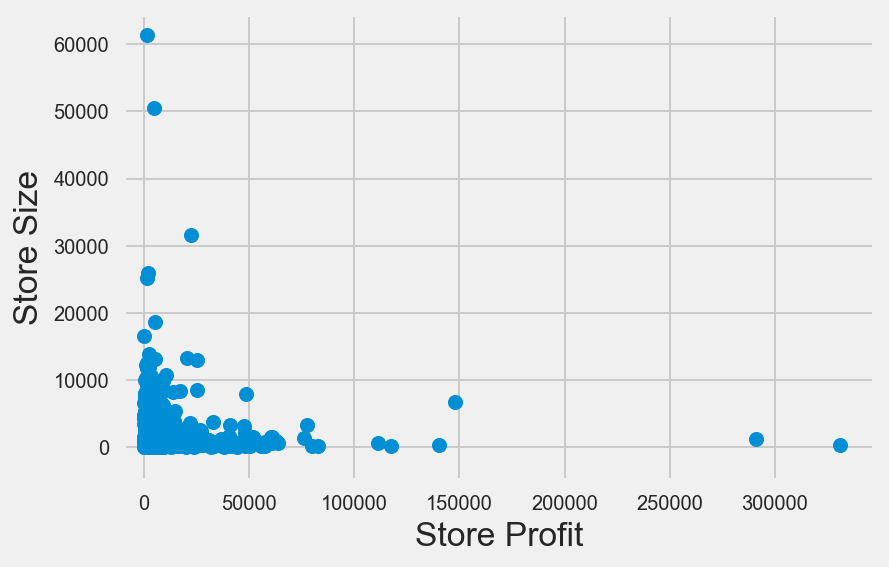

In [22]:
plt.scatter(store_profit, store_size_i)
plt.ylabel("Store Size")
plt.xlabel("Store Profit")
plt.xlim(xmin=-10000)
plt.ylim(ymin=-5000)

As the correlation coefficient and the graph shows, there is very little direct correlation between the two variables.
If I were to asign a shape to this graph I would go for a 1/f(x) graph. This would give a shape that does tangibily represent this graph. 

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

So I am going to group together the Category Name labels into larger groups, based on words that appear in the name. 
For instance I'll group all the categories that contain the word 'vodka'. Hopefully this make the column less greedy. 

The classes that I'll use will be: Vodka, Gin, Brandies, Rum, Schnapps, Liquers-Cocktails-Cordial and Misc. The last category will include category names such as Tequila, Liquers, Amaretto etc. These are mismatch names that don't create a large enough group if split individually, so I'll group them together. 

In [23]:
items = [cat for cat in df_old['Category Name']]

In [25]:
Broad_cate = []

for item in items:
    if type(item) == float:
        Broad_cate.append("NaN")
    else:
        i = item.split()
        if 'BRANDIES' in i or 'BRANDY' in i:
            Broad_cate.append("Brandy")
        elif 'RUM' in i:
            Broad_cate.append("Rum")
        elif 'SCHNAPPS' in i:
            Broad_cate.append("Schnapps")
        elif 'VODKA' in i:
            Broad_cate.append("Vodka")
        elif 'GINS' in i or 'GIN' in i:
            Broad_cate.append("Gin")
        elif 'WHISKIES' in i or 'WHISKY' in i:
            Broad_cate.append("Whisky")
        elif 'LIQUERS' in i or 'LIQUEUR' in i or 'LIQUEURS' in i:
            Broad_cate.append("Liquer")
        elif 'CORDIALS' in i:
            Broad_cate.append("Cordial")
        elif'COCKTAILS' in i:
            Broad_cate.append("Cocktail")
        elif 'CREME' in i:
            Broad_cate.append("Creme")
        elif 'AMARETTO' in i:
            Broad_cate.append("Amaretto")
        else:
            Broad_cate.append("Misc")                 

In [26]:
df_old['Broad Category'] = Broad_cate

In [27]:
df_old.head()

,Date,Store Number,City,Zip Code,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),County,Alt_Date,Broad Category
270857,01/07/2015,9001,SWISHER,52338,MISCELLANEOUS BRANDIES,125,53629,Cedar Ridge Apple Brandy,750,$18.75,$28.13,12,$337.56,9.0,Johnson,20150107,Brandy
270858,01/07/2015,9001,SWISHER,52338,BLENDED WHISKIES,125,27632,Cedar Ridge Short's Whiskey,750,$13.83,$20.75,12,$249.00,9.0,Johnson,20150107,Whisky
270859,01/07/2015,9001,SWISHER,52338,STRAIGHT BOURBON WHISKIES,125,27386,Cedar Ridge Reserve Bourbon,375,$15.00,$22.50,24,$540.00,9.0,Johnson,20150107,Whisky
270860,01/28/2015,9001,SWISHER,52338,STRAIGHT BOURBON WHISKIES,125,17206,Cedar Ridge Bourbon,750,$17.60,$26.40,36,$950.40,27.0,Johnson,20150128,Whisky
270861,02/04/2015,9001,SWISHER,52338,MISCELLANEOUS BRANDIES,125,56666,Cedar Ridge Pear Brandy,375,$14.67,$22.01,12,$264.12,4.5,Johnson,20150204,Brandy


### 5.6 Do relationships exist between the broader liquor type and profit?

In [28]:
Liq_Profit = {}
Liq_Profit_ppl = {}
def liquor_profit(liq):
    cate_i = df_old[df_old['Broad Category'] == liq]
    cate_date_i = cate_i[cate_i['Alt_Date'] < '20151230'].reset_index()

    liq_profit_i = []
    
    for x in range(len(cate_date_i)-1):
        liq_profit_i.append(float(cate_date_i.iloc[x]['Sale (Dollars)'][1:]) - (float(cate_date_i.iloc[x]['State Bottle Cost'][1:]) * cate_date_i.iloc[x]['Bottles Sold']))
        
    Liq_Profit_ppl['{}'.format(liq)] = round((sum(liq_profit_i)/sum(cate_date_i['Volume Sold (Liters)'])), 2)
    Liq_Profit['{}'.format(liq)] = round(sum(liq_profit_i), 2)
    return


In [29]:
for i in set(Broad_cate):
    liquor_profit(i)
del Liq_Profit['NaN']
del Liq_Profit_ppl['NaN']

In [30]:
from operator import itemgetter
a = sorted(Liq_Profit.items(), key=itemgetter(1))
b = sorted(Liq_Profit_ppl.items(), key=itemgetter(1))

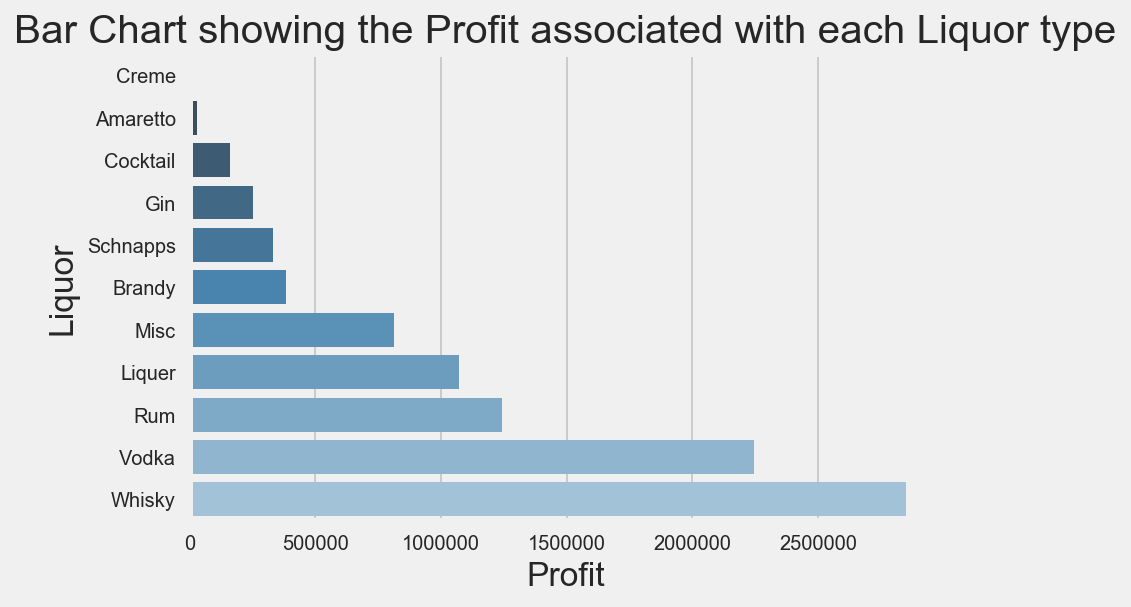

In [31]:
labels = [i[0] for i in a]
values = [v[1] for v in a]

labels1 = [i[0] for i in b]
values1 = [v[1] for v in b]

ax = sns.barplot(x=values, y=labels, palette="Blues_d", orient="h")
ax.set(xlabel="Profit", ylabel="Liquor", title="Bar Chart showing the Profit associated with each Liquor type")

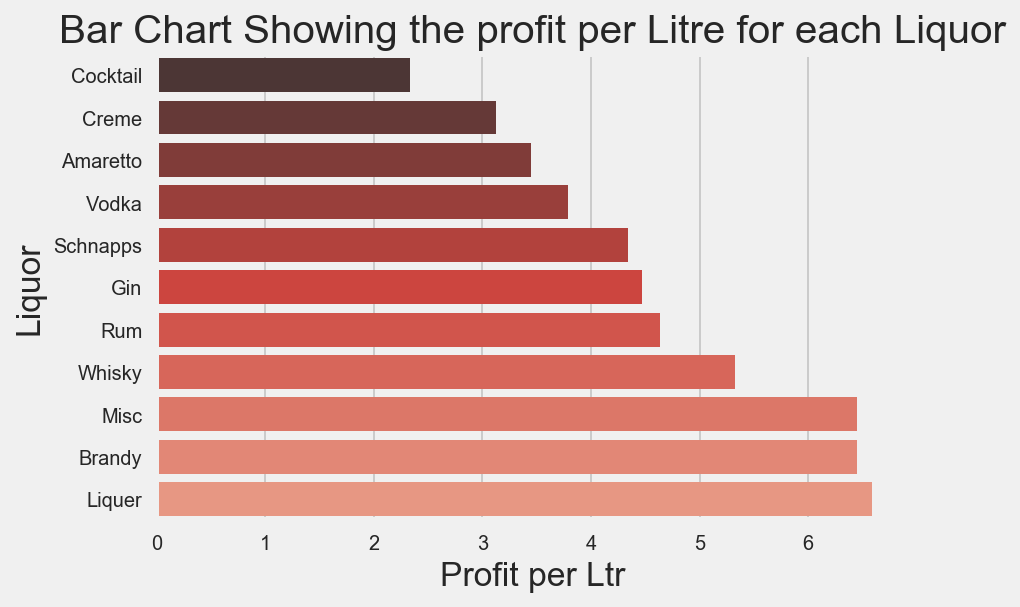

In [32]:
ax1 = sns.barplot(x=values1, y=labels1, palette="Reds_d", orient="h")
ax1.set(xlabel="Profit per Ltr", ylabel="Liquor", title="Bar Chart Showing the profit per Litre for each Liquor")

In [33]:
profit_rank = {}
profit_ppl_rank = {}
for i in range(len(a)):
    profit_rank[a[i][0]] = i
    profit_ppl_rank[b[i][0]] = i

In [34]:
a1, b1 = [a[1] for a in sorted(profit_rank.items(), key=lambda x: x[0])], [b[1] for b in sorted(profit_ppl_rank.items(), key=lambda x: x[0])]


In [35]:
spearmanr(a1, b1)

SpearmanrResult(correlation=0.60000000000000009, pvalue=0.051003260706950743)

As you can see from the graph above, Whisky and Vodka produce a lot more profit than the others. This could well be because of the number of units sold. So I then plotted a graph to show the profit per litre, to see if that changes the story. It really did change the perspective. Vodka falls down the table now, with Liquer shooting to the top along with Misc (which contains Tequila, Misc(which contains more exotic, unusual alcohols) and Brandy.
I did a quick Spearman's rank and showed that there is a definite positive correlation between the two pieces of data and it is significant (~95% confidence intervals).


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [36]:
brand = [i.split()[0] for i in df_old["Item Description"]]

In [37]:
df_old['Brand'] = brand

In [38]:
brand_sale = {}
brand_profit = {}

In [39]:
def brand_sale_profit(brand):
    brand_i = df_old[df_old['Brand'] == brand]
    brand_date_i = brand_i[brand_i['Alt_Date'] < '20151230']
    
    sales_i = []
    profit_i = []
    
    for x in range(len(brand_date_i)-1):
        profit_i.append(float(brand_date_i.iloc[x]['Sale (Dollars)'][1:]) - (float(brand_date_i.iloc[x]['State Bottle Cost'][1:]) * brand_date_i.iloc[x]['Bottles Sold']))
        sales_i.append(float(brand_date_i.iloc[x]['Sale (Dollars)'][1:]))
    
    brand_sale['{}'.format(brand)] = round(sum(sales_i), 2)
    brand_profit['{}'.format(brand)] = round(sum(profit_i), 2)
    return
                                             

In [40]:
for b in set(brand):
    brand_sale_profit(b)

In [41]:
big_brands = [k for k in brand_sale.keys() if brand_sale[k] > 300000]
big_brands_sale = [brand_sale[big_brands[x]] for x in range(len(big_brands))]
big_brands_profit = [brand_profit[big_brands[x]] for x in range(len(big_brands))]

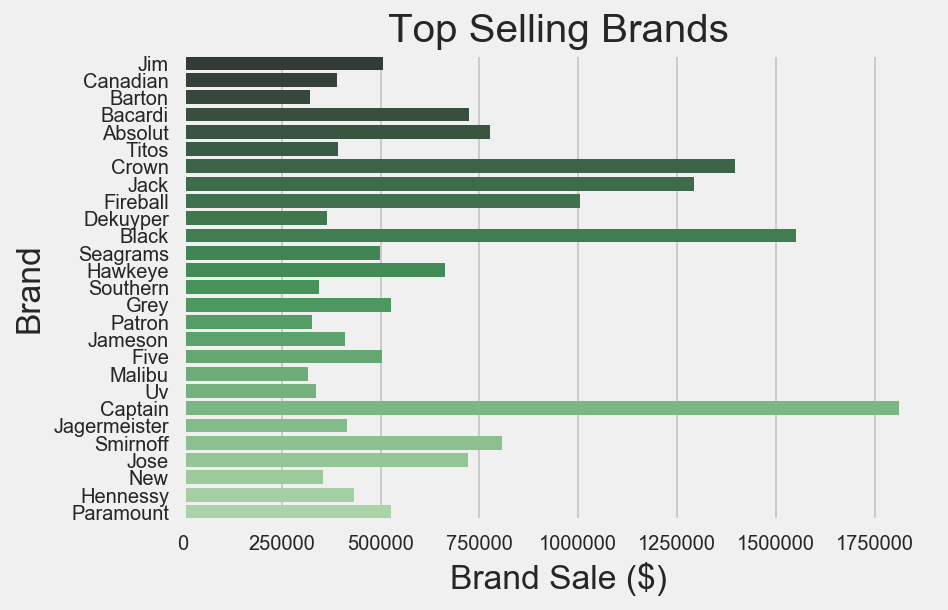

In [42]:
ax = sns.barplot(y=big_brands, x=big_brands_sale, palette="Greens_d")
ax.set(xlabel="Brand Sale ($)", ylabel="Brand", title="Top Selling Brands")

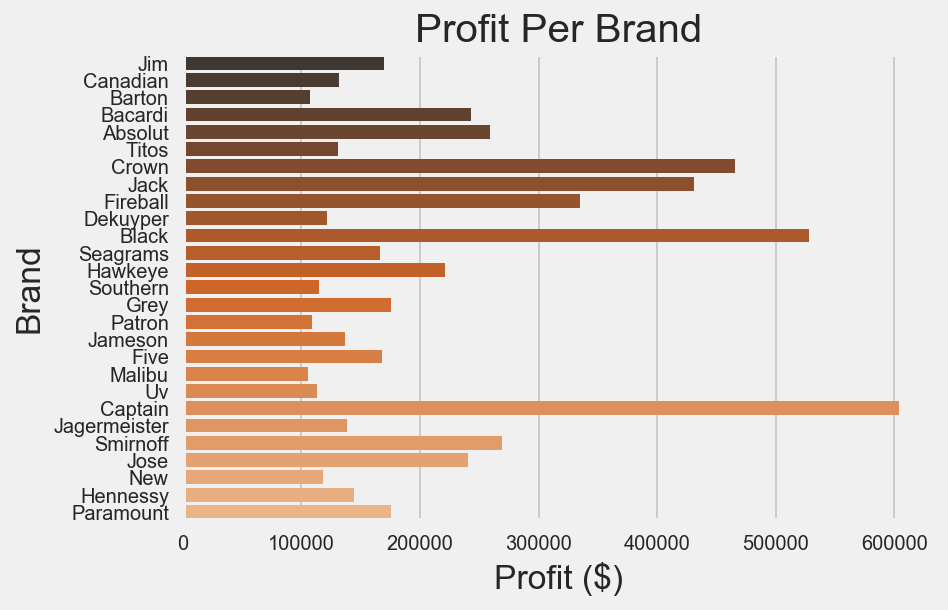

In [43]:
ax1 = sns.barplot(x=big_brands_profit, y=big_brands, palette="Oranges_d")
ax1.set(xlabel="Profit ($)", ylabel="Brand", title="Profit Per Brand")

I was a little unsure as to how to sort the brands because looking at the item description, it gave a very detailed analysis of the product which included the brand and then more specific description. 
So to do a quick vanilla analysis I just selected the first word of each Item Description entry and then that became my brand. E.g Captain Morgan spiced rum -> Captain.
This is obviously not the best way of doing and I could tidy it up a bit, but for speed this way works the best.
Having sorted the brands as I did, there were a lot of categories that had only a minor amount of sales. To trim the brands down to major ones I created a subjective threshold of > 300000 sales in 2015. This was to highlight what brands were selling the most, as these are the ones that will dominant store and consumer activity. 
As you can see, Captain Morgan is the most popular by a good followed closely by Black Velvet. 
As expected the profit and branding correlate exactly. 

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [44]:
Captain_sold = {}

def Amount_Cap(store):
    cap_i = df_old[df_old['Store Number'] == store]
    cap_date_i = cap_i[cap_i['Alt_Date'] < '20151230']
    
    Cap_sold = []
    
    for x in range(len(cap_date_i)-1):
        Cap_sold.append(float(cap_date_i.iloc[x]['Sale (Dollars)'][1:]))
    
    Captain_sold['{}'.format(store)] = round(sum(Cap_sold), 2)
    return


In [45]:
for stores in old_stores:
    Amount_Cap(stores)

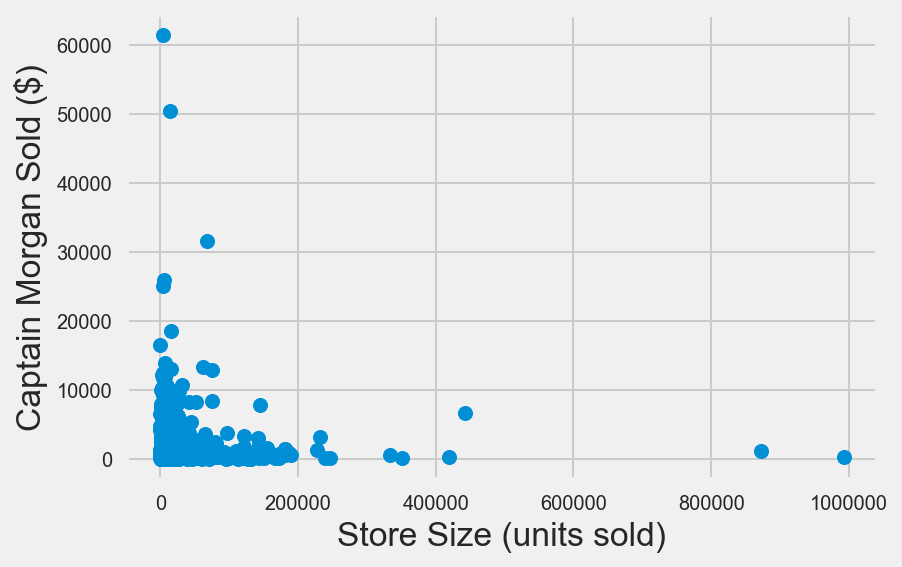

In [46]:
plt.scatter(Captain_sold.values(), store_size_i)
# plt.xlim([-1000, 50000])
# plt.ylim([-1000, 7000])
plt.xlabel("Store Size (units sold)")
plt.ylabel("Captain Morgan Sold ($)")


I would suggest taxing alcohol that will affect the larger stores more than the smaller stores. Brandy and Liquer are the strongest performers in terms of sales and profit, so they would be the natural target to tax. However, this tax will also affect smaller stores as they also will be selling hard alcohol and hoping to reap the benefits. As such I would suggest taxing the amount of hard alcohol sold. Larger stores will naturally be selling more hard alcohol and hence will be penalised more. This metric will scale proportionally with size without actually being a size proxy directly. 


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [63]:
Q115_sales = {}
Q116_sales = {}

def q1_q2_sales(county):
    count15_i = df_old[(df_old['County'] == county) & (df_old['Alt_Date'] > '20150101') & (df_old['Alt_Date'] < '20150401')]
    count16_i = df_old[(df_old['County'] == county) & (df_old['Alt_Date'] > '20160101') & (df_old['Alt_Date'] < '20160401')]
    sales_2015 = round(sum([float(count15_i.iloc[x]['Sale (Dollars)'][1:]) for x in range(len(count15_i)-1)]), 2)
    sales_2016 = round(sum([float(count16_i.iloc[x]['Sale (Dollars)'][1:]) for x in range(len(count16_i)-1)]), 2)
    
    Q115_sales[county], Q116_sales[county] = sales_2015, sales_2016
    return

In [64]:
for c in set_county:
    q1_q2_sales(c)

In [65]:
len(set_county)

98

In [66]:
def graph(x, y):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    y_values = Q115_sales.keys()
    ax1.scatter(Q115_sales.values()[x:y], [i for i in range(len(y_values))][x:y], c="r", marker="s", label="Q1 2015")
    ax1.scatter(Q116_sales.values()[x:y], [i for i in range(len(y_values))][x:y], c="b", label="Q1 2016")
    plt.yticks([i for i in range(x, y)], y_values[x:y])
    ax1.legend(loc="upper right")
    ax1.set(xlabel="Sales ($)", ylabel="County", title="Showing the Separation between Q1-2015 and Q1-2016 sales for each County")
    
    return ax1, plt

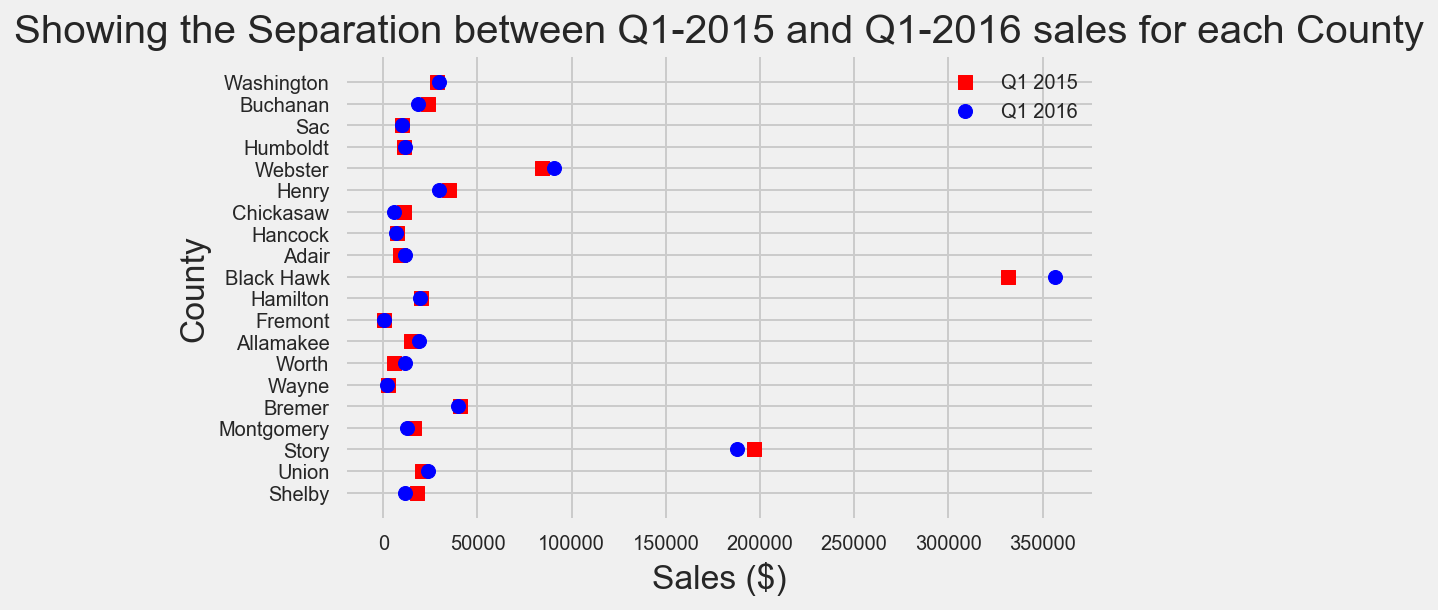

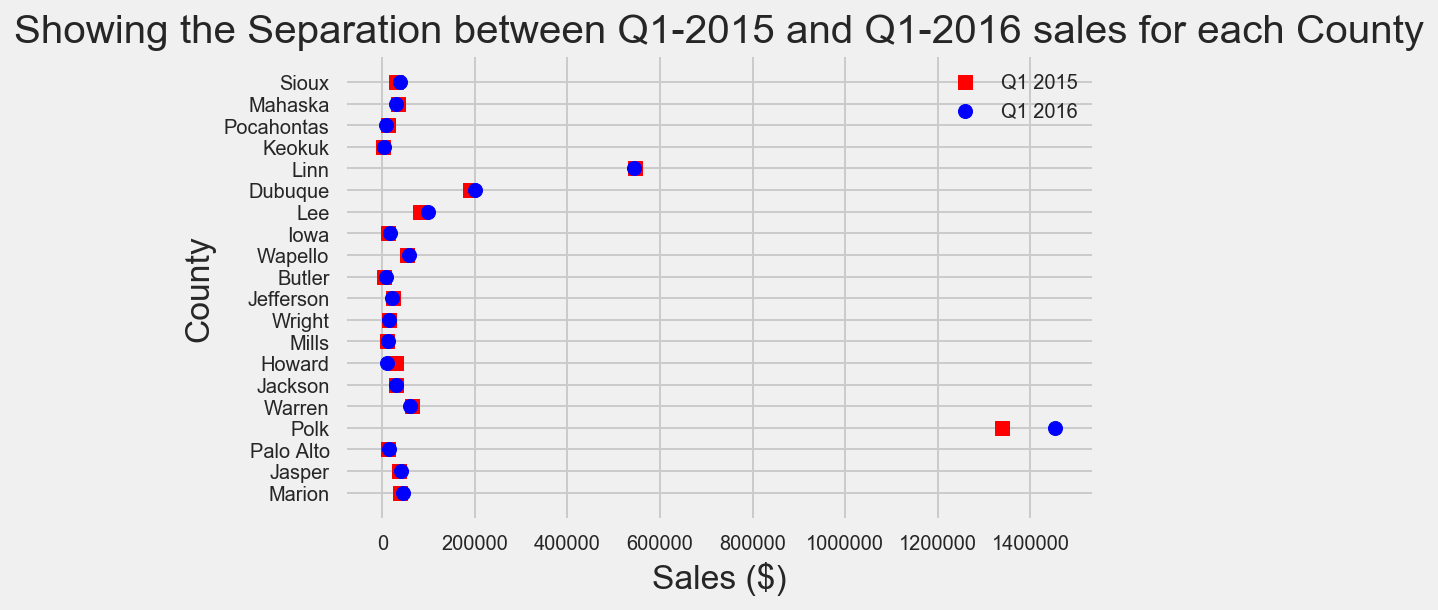

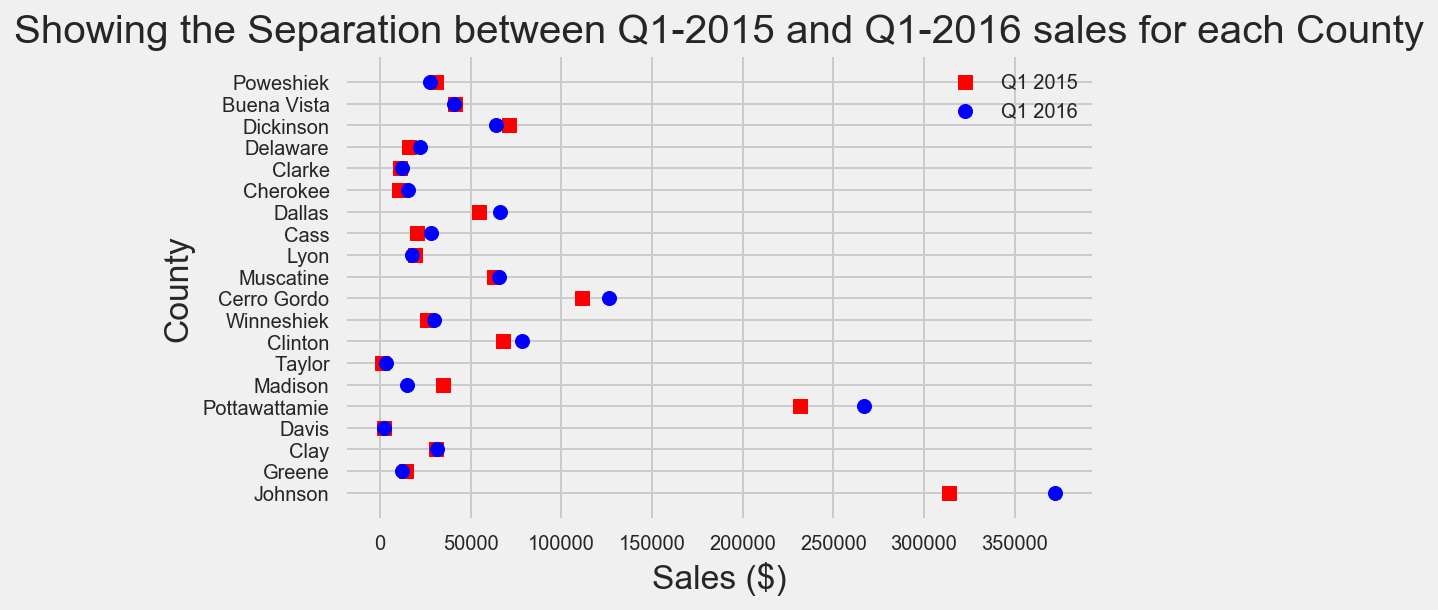

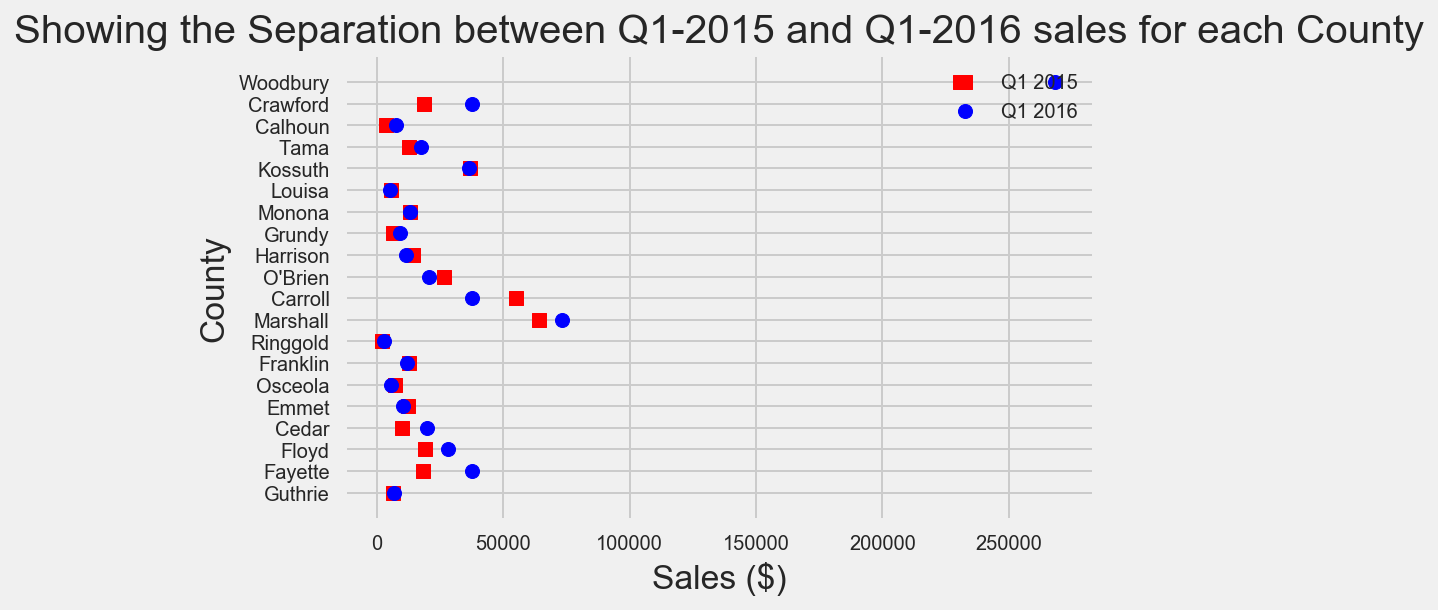

In [67]:
county_sep = [[0, 20], [20, 40], [40, 60], [60, 80], [80, 100]]
for x in range(len(county_sep)-1):
    graph(county_sep[x][0], county_sep[x][1])

From the graph above you can see that there are a few counties that standout above the rest, in that they have both a high amount of Q1 2015 sales and higher Q1 2016 sales. Specifically: Polk, Woodbury, Johnson and Pottawattamie.
Some counties have very obviously done quite badly, e.g. Carroll, their Q1 2016 earnings fell relative to their Q1 2015 earnings. 

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [59]:
per_chan = {}

for x in range(len(Q115_sales)-1):
    per_chan[Q115_sales.keys()[x]] = round(((Q116_sales.values()[x] - Q115_sales.values()[x]) / (Q115_sales.values()[x])*100), 2)

In [60]:
a = sorted(per_chan.items(), key=itemgetter(1))

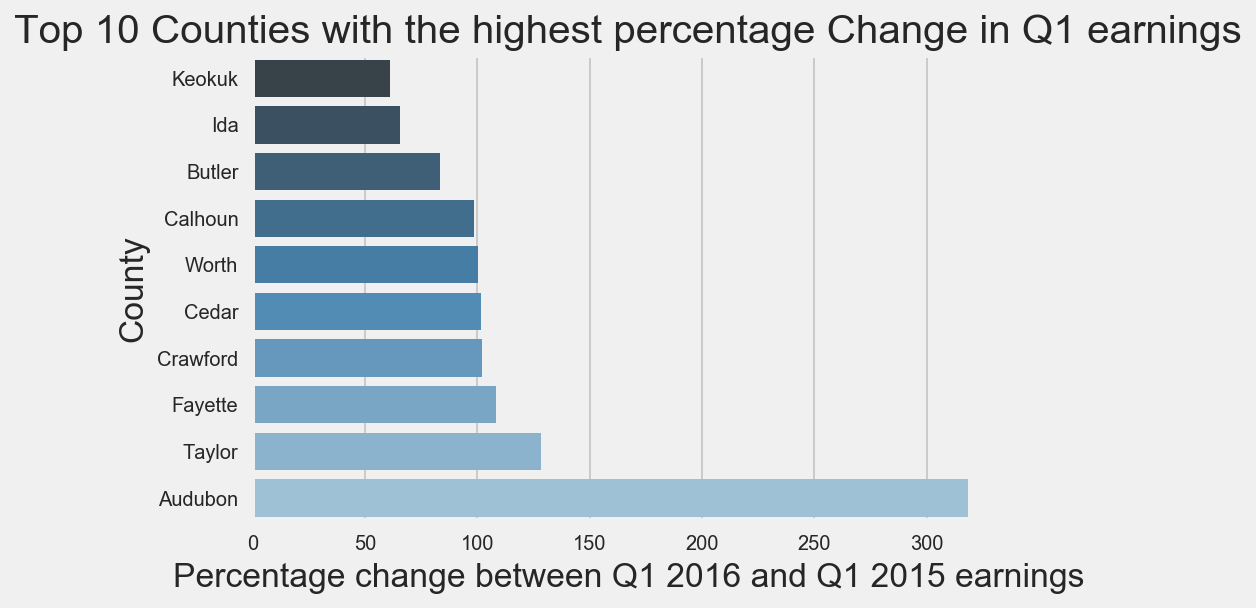

In [61]:
ax = sns.barplot(x=[i[1] for i in a][len(a)-10: len(a)], y=[b[0] for b in a][len(a)-10:len(a)], palette="Blues_d")
ax.set(xlabel="Percentage change between Q1 2016 and Q1 2015 earnings", ylabel="County", title="Top 10 Counties with the highest percentage Change in Q1 earnings")

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

Based on the above analysis, I would choose to put a new store in Johnson. This has the biggest (increase):(starting value) ratio and hence will be best placed to give the store owner immediately good sales whilst also giving the store owner a good history of sale increases from one year to the next. Many of the stores in the percentage increase top 10 are there simply because they had a small starting point. This would not be beneficial. 

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

I would suggest selling Captain Morgan in his store, because that was a clear winner in terms of number of units sold. It had very obvious popularity. As well as that I would sell whisky, vodka and rum, as these would combine to give you most profit per litre. This is obviously extremely important for the a new store to maximise revenue whilst minimizing costs. The location will not affect the sale of liquor, as my analysis has shown that liquor preferences are fairly homogeneous, just the amount sold varies. 